# 사물 이미지 분류 경진대회 EDA


10 종류의 이미지와 라벨을 이용해 test셋의 이미지들을 적절한 라벨로 분류하는 대회입니다.  
label은 0에서부터 9까지의 정수 값으로 이루어져 있습니다.  


## 데이터 로드

In [136]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import PIL
from glob import glob
%matplotlib inline
#경고 메세지 숨김
warnings.filterwarnings("ignore")

PIL.Image

<module 'PIL.Image' from 'C:\\Users\\User\\anaconda3\\lib\\site-packages\\PIL\\Image.py'>

주어진 데이터를 불러오기 위한 함수를 사용

path에 이미지 데이터 파일의 경로를 입력하면 image와 array값으로 return

In [137]:
def load_CLFAR10(path):
    path = path
    images = []
    labels = []
    for file_name in glob(path + "*"):
        for img in glob(file_name + "/*.jpg"):
            an_img = PIL.Image.open(img) #read img
            img_array = np.array(an_img) #img to array
            images.append(img_array) #append array to traing_images
            label = file_name.split("train\\")[1] #get label
            labels.append(label) # append label
    images = np.array(images)
    labels = np.array(labels)
    
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    labels = labels.reshape(-1,1)
    return images, labels

## 간단한 EDA
이미지의 데이터 크기를 확인

train 데이터 불러오기 

In [138]:
path = "C:/Users/User/Desktop/DataScience/data/object_image_classification_data/train/"
train_images, train_labels = load_CLFAR10(path=path)
print("train 이미지 크기 : {}".format(train_images.shape))
print("train 라벨 크기 : {}".format(train_labels.shape))

train 이미지 크기 : (50000, 32, 32, 3)
train 라벨 크기 : (50000, 1)


총 5만개의 이미지가 존재하며 train 이미지에서 마지막 숫자 3은 RGB값을 나타냅니다.  
카데고리별 이미지가 순서대로 정렬되어 있기 때문에 random함수를 사용해 랜덤하게 10개 이미지를 출력해보겠습니다.  

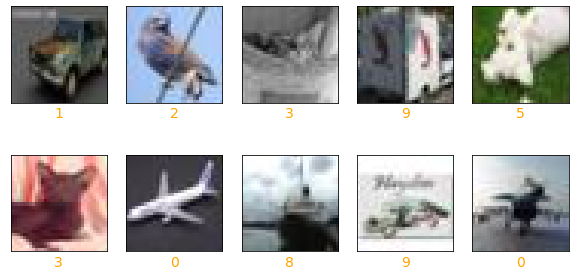

In [190]:
import random
plt.figure(figsize=(10,5))
for i in range(10):
    num = random.randint(0, 50000)
    ax = plt.subplot(2,5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    ax.xaxis.label.set_color("orange")
    ax.xaxis.label.set_fontsize(14)
    plt.xlabel(train_labels[num][0])
    plt.imshow(train_images[num])
plt.show()

다양한 이미지가 존재하는 것을 알 수 있습니다.  
라벨을 출력해보면 0~9의 값을 보이는것을 알 수 있습니다. 

In [191]:
print(np.unique(train_labels))

[0 1 2 3 4 5 6 7 8 9]


라벨의 분포를 확인해겠습니다

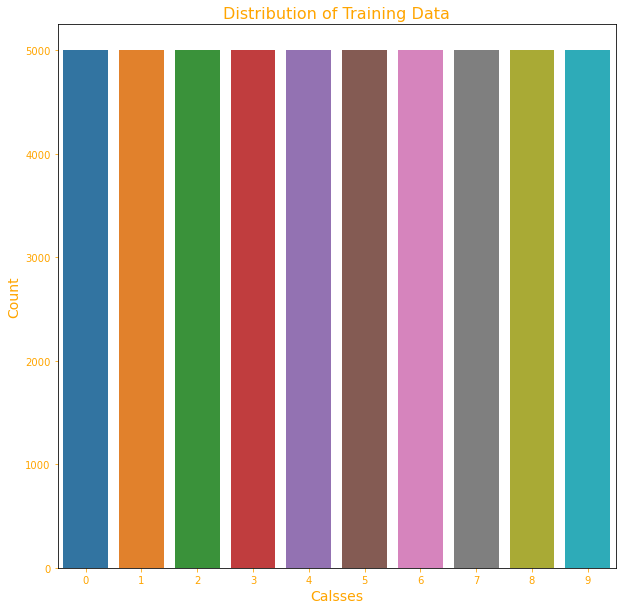

In [192]:
plt.figure(figsize=(10,10))
fig = sns.countplot(train_labels.ravel())
#그래프의 제목 지정 및 색 변경
fig.set_title("Distribution of Training Data", size=16).set_color('orange')
#그래프의 x축 이름 지정 및 색 변경
fig.set_xlabel("Calsses", size=14)
fig.xaxis.label.set_color('orange')
#그래프의 x축 값 색 변경
fig.tick_params(axis='x', colors='orange')
#그래프의 y축 이름 지정 및 색 변경
fig.set_ylabel("Count", size=14)
fig.yaxis.label.set_color('orange')
#그래프의 y축 값 색 변경
fig.tick_params(axis='y', colors='orange')
plt.show()

데이터가 모두 5000개로 균등하게 분포되어 있는 것을 확인할 수 있습니다.  